# Lending Club Case Study

## Initial Setup

In [478]:
# Import required libraries for Exploratory Data Analysis
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [479]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [480]:
# Set a chart style for this notebook
plt.style.use('dark_background')

Load the loan dataset

In [481]:
loan_data = pd.read_csv('./loan.csv', low_memory=False)

In [482]:
loan_data.shape

(39717, 111)

In [483]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [484]:
# Get a preview of the dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


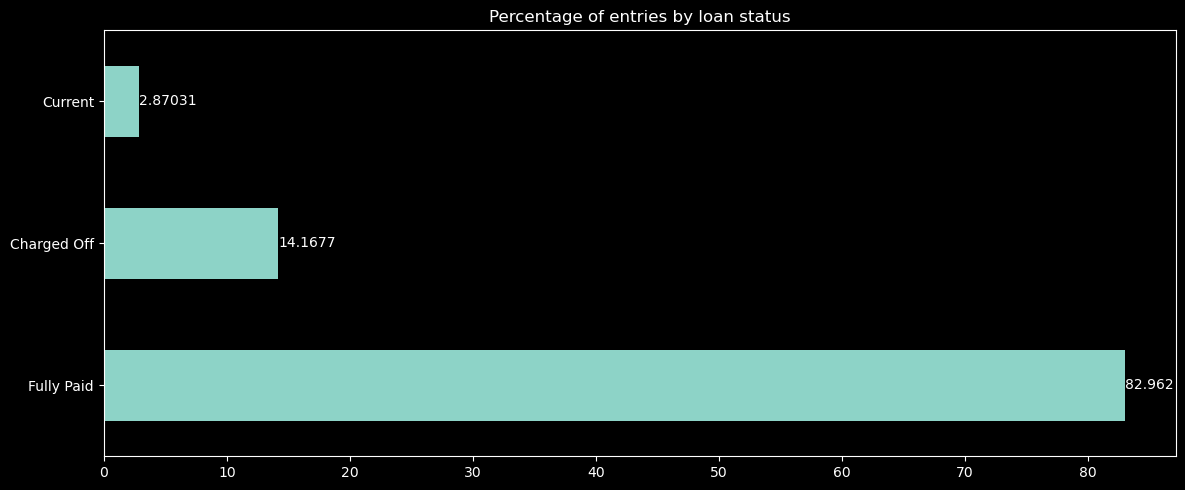

In [485]:
ax = (loan_data.loan_status.value_counts(normalize=True) * 100).plot(
    kind='barh',
    figsize=(12, 5)
)
ax.bar_label(ax.containers[0])
plt.title("Percentage of entries by loan status")
plt.tight_layout()
plt.show()

> __Insight:__ Approximately 14% of the loans have defaulted

In [486]:
# Storing all the column names before the drop operation
before_drop = set(loan_data.columns)

In [487]:
# Remove the entries having "Current" loan_status as they are not helpful for analysis. 
loan_data = loan_data[~(loan_data.loan_status == 'Current')]

In [488]:
# Drop columns that have more than 50% of the values missing
loan_data.dropna(axis='columns', thresh=int(0.5 * loan_data.shape[0]), inplace=True)

# Check row & column count
loan_data.shape

(38577, 54)

In [489]:
after_drop = set(loan_data.columns)
dropped_columns = before_drop.difference(after_drop)
dropped_columns

{'acc_open_past_24mths',
 'all_util',
 'annual_inc_joint',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'dti_joint',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_il_6m',
 'open_rv_12m',
 'open_rv_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_coll_amt',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 '

- 111 - 43 = __68 columns__ are dropped as they did not have any values and hence not useful for analysis.
- 1,140 rows dropped as they represent loan status "Current", which is not helpful for analysis. 

In [490]:
# Inspect datatype of each column to see if any of the datatypes don't make sense
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

A lot of columns have `object` data type. Let's look at these columns in isolation to better understand if `object` is indeed the right data type for these columns. 

In [491]:
loan_data.select_dtypes('object').head(5)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
5,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL


As per the data dictionary, the column definition for `term` is "The number of payments on the loan. Values are in months and can be either `36` or `60`". As it is, the term column is not suitable for analysis as it contains strings. Let's convert it into a integer column. 

In [492]:
# Check if the term column has any empty values
loan_data.term.isna().sum()

0

The term column does not contain any null values. Let's convert the data type now. 

In [493]:
loan_data.term = loan_data.term.apply(lambda x: int(x.strip().split(" ")[0]))

In [494]:
# Verify that the data type is correct
loan_data.term.head(5)

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [495]:
loan_data.select_dtypes('object')

,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
5,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,8.07%,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,...,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,f,Jul-10,Jun-10,INDIVIDUAL
39713,10.28%,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,n,...,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,f,Jul-10,Jul-10,INDIVIDUAL
39714,8.07%,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,...,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,f,Apr-08,Jun-07,INDIVIDUAL
39715,7.43%,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,...,other,JAL Loan,208xx,MD,Nov-88,0.70%,f,Jan-08,Jun-07,INDIVIDUAL


It can also be noticed that the `int_rate` column which denotes the interest rate of the loan is a string. Let's change that to a float. 

In [496]:
# Let's verify if there are any empty values for interest rate
loan_data.int_rate.isna().sum()

0

In [497]:
# Since there aren't any empty values, let's proceed with converting the data type
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x[:-1]))

In [498]:
# Verify that the data type is correct
loan_data.int_rate.head(5)

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [499]:
loan_data.select_dtypes('object')

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
5,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,f,Jul-10,Jun-10,INDIVIDUAL
39713,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,f,Jul-10,Jul-10,INDIVIDUAL
39714,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,f,Apr-08,Jun-07,INDIVIDUAL
39715,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,other,JAL Loan,208xx,MD,Nov-88,0.70%,f,Jan-08,Jun-07,INDIVIDUAL


In [500]:
issue_d = pd.to_datetime(loan_data.issue_d, format="%b-%y").dt
loan_data['issue_month'] = issue_d.month
loan_data['issue_year'] = issue_d.year

In [501]:
loan_data.loc[:, ['issue_month', 'issue_year']]

,issue_month,issue_year
0,12,2011
1,12,2011
2,12,2011
3,12,2011
5,12,2011
...,...,...
39712,7,2007
39713,7,2007
39714,7,2007
39715,7,2007


In [502]:
# check if loan_status has any empty values
loan_data.loan_status.isna().sum()

0

Since pymnt_plan has only one value, it's not required for analysis and hence can be dropped

In [503]:
# url is not helpful with analysis, hence dropping it
loan_data.drop('url', axis='columns', inplace=True)

In [504]:
# desc isn't helpful, dropping the column
loan_data.drop('desc', axis='columns', inplace=True)

In [505]:
loan_data.select_dtypes('object')

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
5,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,f,Jul-10,Jun-10,INDIVIDUAL
39713,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,n,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,f,Jul-10,Jul-10,INDIVIDUAL
39714,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,f,Apr-08,Jun-07,INDIVIDUAL
39715,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,other,JAL Loan,208xx,MD,Nov-88,0.70%,f,Jan-08,Jun-07,INDIVIDUAL


In [506]:
# find all columns that have only one value and remove them
column_unique = loan_data.nunique()
c1 = column_unique[column_unique.values == 1]
print(c1.index)

loan_data.drop(columns = list(c1.index), inplace=True)

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')


In [507]:
loan_data.select_dtypes('object')

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
0,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,Jan-85,83.70%,Jan-15,May-16
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,Sep-13
2,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,Nov-01,98.50%,Jun-14,May-16
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,Feb-96,21%,Jan-15,Apr-16
5,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,Jan-15,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,Jul-10,Jun-10
39713,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,Jul-10,Jul-10
39714,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,Apr-08,Jun-07
39715,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,other,JAL Loan,208xx,MD,Nov-88,0.70%,Jan-08,Jun-07


In [508]:
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,12,2011


In [509]:
# checking if the member_id is unique
loan_data.member_id.is_unique

True

In [510]:
float_columns = list(loan_data.select_dtypes('float64').columns)
print(float_columns)

['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']


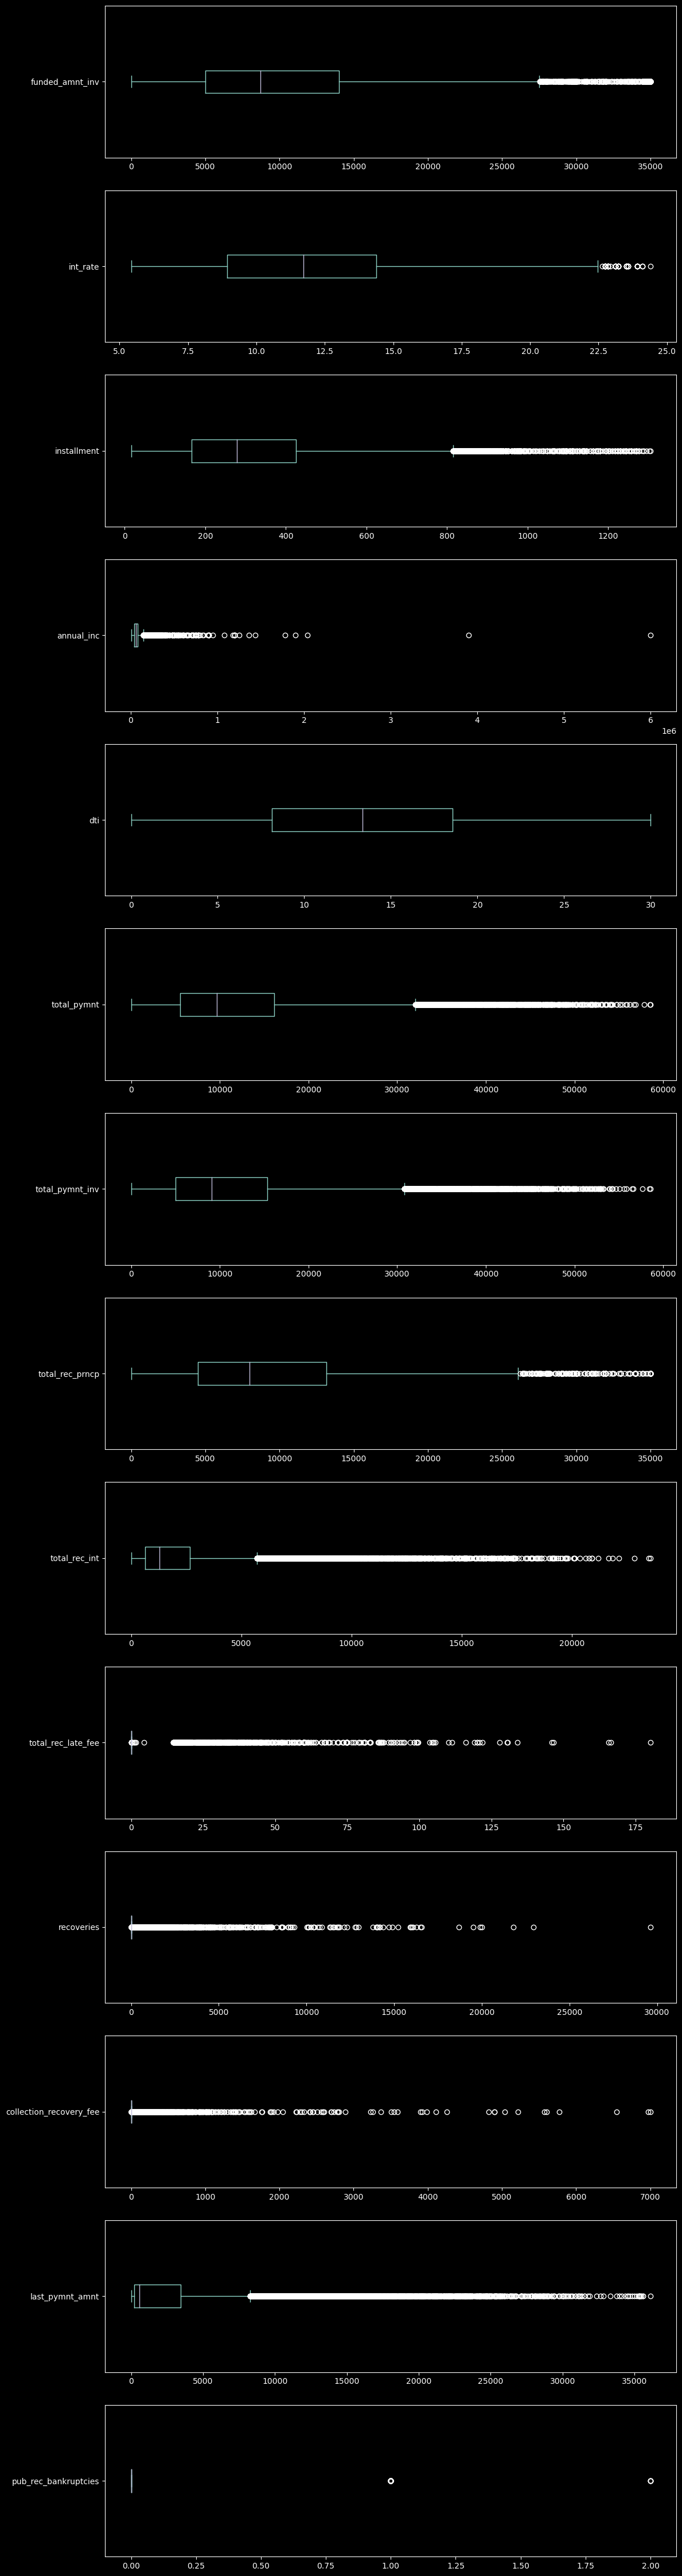

In [511]:
fig, ax = plt.subplots(nrows=len(float_columns), ncols=1, figsize=(12, 45))
for i in range(0, len(float_columns)):
    loan_data[float_columns[i]].plot.box(ax=ax[i], vert=False)
plt.tight_layout()
plt.show()

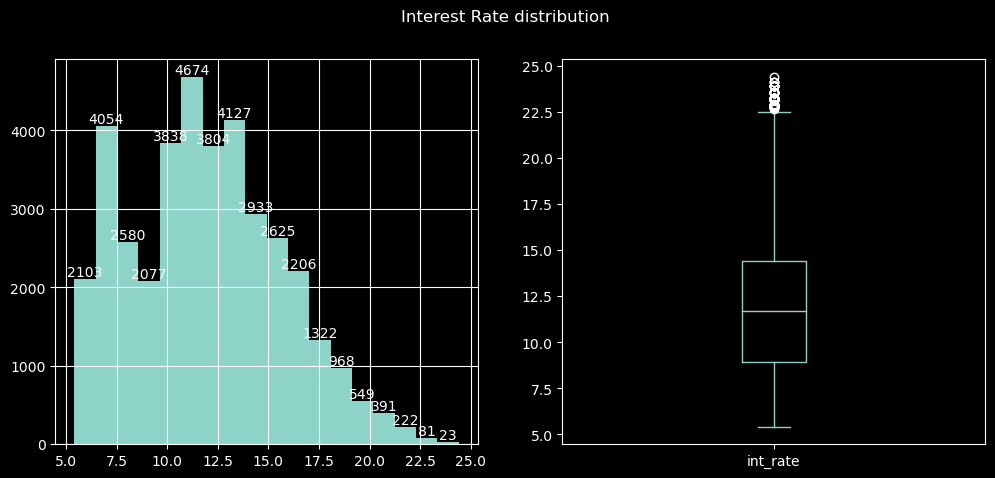

In [512]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
hist_ax = loan_data.int_rate.hist(bins=18, ax=ax[0])
hist_ax.bar_label(hist_ax.containers[0])
loan_data.int_rate.plot.box(ax=ax[1])
plt.suptitle('Interest Rate distribution')
plt.show()

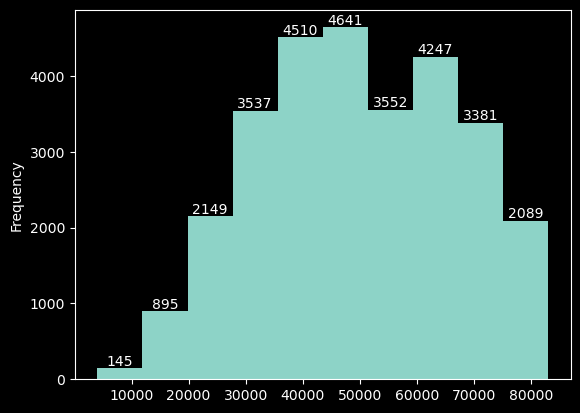

In [513]:
hist_ax = loan_data[loan_data.annual_inc <= 83000].annual_inc.plot.hist()
hist_ax.bar_label(hist_ax.containers[0])
plt.show()

<AxesSubplot:ylabel='Frequency'>

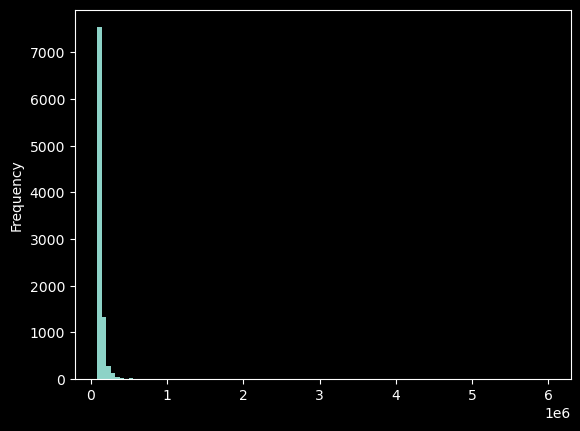

In [514]:
loan_data[loan_data.annual_inc > 83000].annual_inc.plot.hist(bins=100)

In [515]:
np.percentile(loan_data.annual_inc, [0.25, 0.75])

array([10000. , 13277.8])

In [516]:
loan_data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [517]:
(loan_data.isna().sum() / loan_data.shape[0]) * 100

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

In [518]:
# The title and emp_title are not helpful for analysis 
loan_data.drop(['title', 'emp_title'], axis='columns', inplace=True)

In [519]:
loan_data.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

In [520]:
# dropping rows that contain missing values
loan_data.dropna(axis='index', how='any', inplace=True)

In [521]:
# verify that there are no missing values
loan_data.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

In [522]:
data = loan_data.annual_inc.value_counts().reset_index()
data

,index,annual_inc
0,60000.00,1408
1,50000.00,992
2,40000.00,824
3,45000.00,771
4,75000.00,760
...,...,...
4928,82116.00,1
4929,242400.00,1
4930,133300.00,1
4931,125000.32,1


In [523]:
data.index

RangeIndex(start=0, stop=4933, step=1)

In [524]:
list(data)

['index', 'annual_inc']

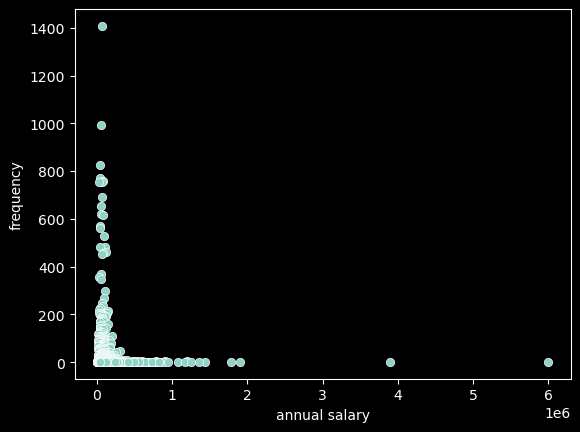

In [525]:
fig, ax = plt.subplots()
# plt.xscale('log')
# plt.yscale('log')
sns.scatterplot(data=data, x='index', y='annual_inc', ax=ax)
plt.xlabel('annual salary')
plt.ylabel('frequency')
plt.show()

In [526]:
loan_data.select_dtypes('object')

,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
0,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,Jan-85,83.70%,Jan-15,May-16
1,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,309xx,GA,Apr-99,9.40%,Apr-13,Sep-13
2,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,Nov-01,98.50%,Jun-14,May-16
3,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,917xx,CA,Feb-96,21%,Jan-15,Apr-16
5,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,Nov-04,28.30%,Jan-15,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,C,C1,1 year,RENT,Not Verified,Nov-07,Fully Paid,debt_consolidation,226xx,VA,Mar-00,68.70%,Aug-08,Aug-08
39573,C,C2,3 years,MORTGAGE,Not Verified,Nov-07,Fully Paid,debt_consolidation,853xx,AZ,Feb-89,79%,May-10,Apr-16
39623,D,D3,8 years,MORTGAGE,Not Verified,Oct-07,Charged Off,debt_consolidation,207xx,MD,Aug-97,62.90%,May-08,May-16
39666,C,C4,2 years,MORTGAGE,Not Verified,Aug-07,Charged Off,debt_consolidation,201xx,VA,Nov-92,34.30%,Oct-09,Mar-10


In [527]:
def parse_emp_length(value):
    tokens = value.split(' ')
    numeric_value = tokens[1] if value[0] == '<' else tokens[0]
    if numeric_value[-1] == '+':
        numeric_value = numeric_value[:-1]
    return int(numeric_value)

In [528]:
# convert emp_length to int type
loan_data.emp_length = loan_data.emp_length.apply(parse_emp_length)

In [529]:
loan_data.emp_length.describe()

count    36737.000000
mean         5.082995
std          3.399271
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

Columns that can be used for outlier removal
loan amount
income 
grade *
int_rate
loan term *
funded_amnt
funded_amnt_inv

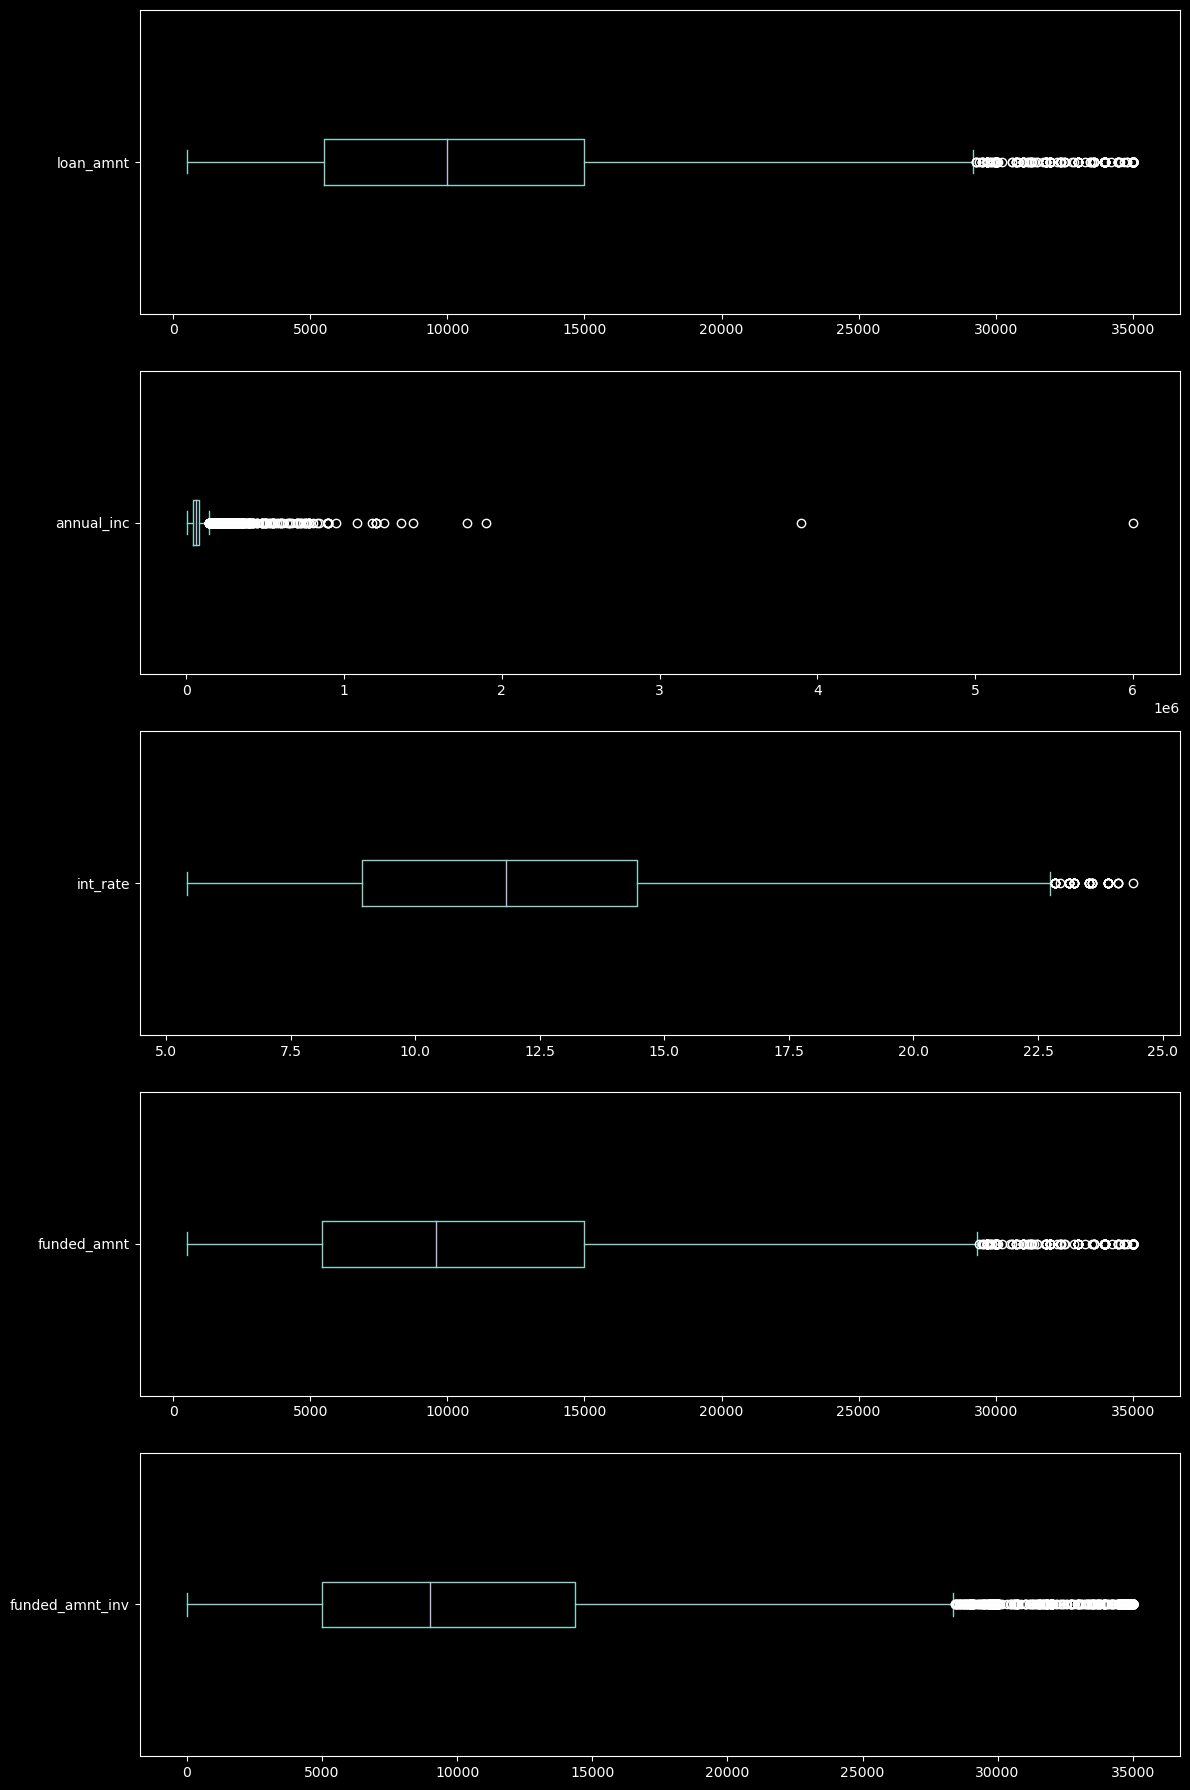

In [530]:
columns = ['loan_amnt', 'annual_inc', 'int_rate', 'funded_amnt', 'funded_amnt_inv']
fig, ax = plt.subplots(nrows=len(columns), ncols=1, figsize=(12, 18))
for i in range(0, len(columns)):
    loan_data[columns[i]].plot.box(ax=ax[i], vert=False)
plt.tight_layout()
plt.show()

In [531]:
def get_outlier_bounds(series):
    quantiles = np.quantile(series, [0.25, 0.75])
    IQR = quantiles[1] - quantiles[0]
    bounds = (quantiles[0] - 1.5 * IQR, quantiles[1] + 1.5 * IQR)
    return bounds

In [532]:
def remove_outliers(dataframe, column):
    bounds = get_outlier_bounds(dataframe[column])
    dataframe = dataframe[(dataframe[column] >= bounds[0]) & (dataframe[column] <= bounds[1])]

In [533]:
columns_for_outlier_removal = ['loan_amnt', 'annual_inc', 'int_rate']
for column in columns_for_outlier_removal:
    remove_outliers(loan_data, column)

# TODO: Refactor to make this generic 
bounds = get_outlier_bounds(loan_data.loan_amnt)
print(bounds)
loan_data = loan_data[(loan_data.loan_amnt >= bounds[0]) & (loan_data.loan_amnt <= bounds[1])]

bounds = get_outlier_bounds(loan_data.annual_inc)
print(bounds)
loan_data = loan_data[(loan_data.annual_inc >= bounds[0]) & (loan_data.annual_inc <= bounds[1])]

bounds = get_outlier_bounds(loan_data.int_rate)
print(bounds)
loan_data = loan_data[(loan_data.int_rate >= bounds[0]) & (loan_data.int_rate <= bounds[1])]

(-8750.0, 29250.0)
(-18756.0, 139260.0)
(0.8450000000000006, 22.325)


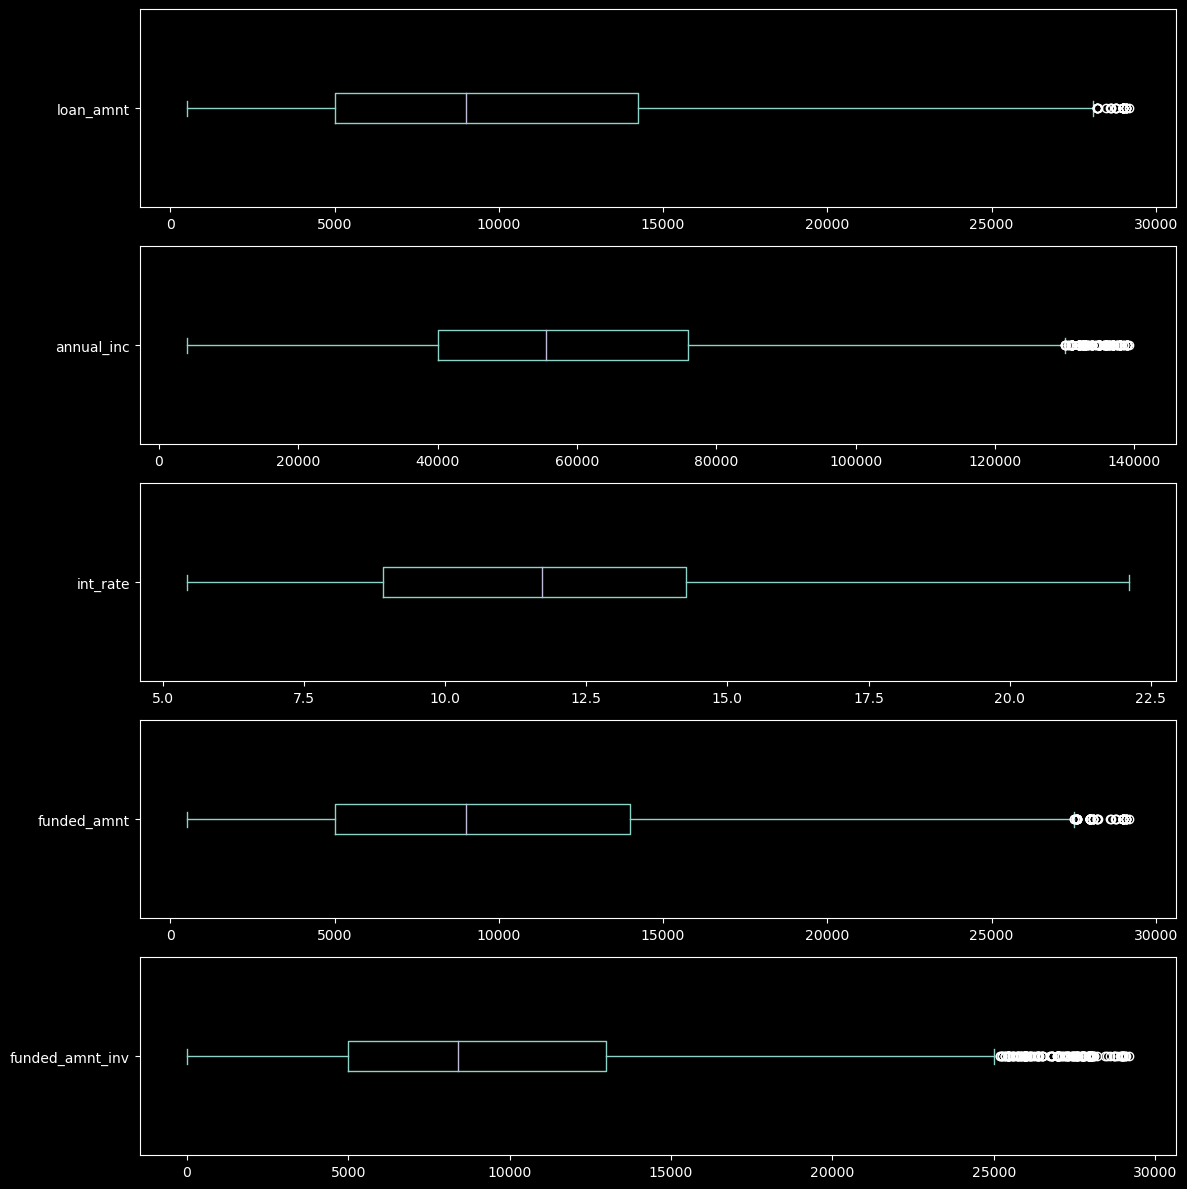

In [534]:
columns = ['loan_amnt', 'annual_inc', 'int_rate', 'funded_amnt', 'funded_amnt_inv']
fig, ax = plt.subplots(nrows=len(columns), ncols=1, figsize=(12, 12))
for i in range(0, len(columns)):
    loan_data[columns[i]].plot.box(ax=ax[i], vert=False)
plt.tight_layout()
plt.show()

In [535]:
# TODO: Defaults by Grade / Subgrade
# TODO: Defaults by purpose
# TODO: Correlation between loan_amnt, funded_amnt, grade

## Univariate 

### Annual Income

In [536]:
loan_data.annual_inc.describe()

count     33848.000000
mean      60364.522638
std       26811.304484
min        4000.000000
25%       40000.000000
50%       55500.000000
75%       76000.000000
max      139200.000000
Name: annual_inc, dtype: float64

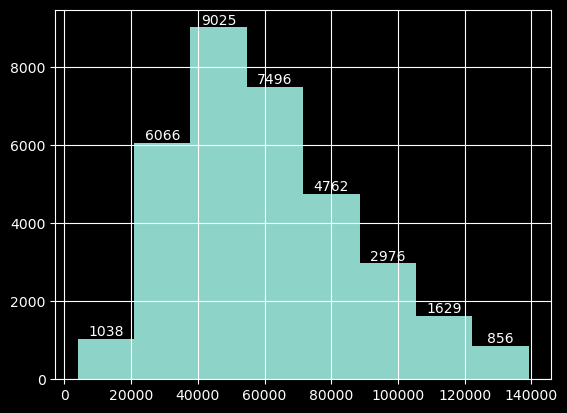

In [537]:
hist_ax = loan_data.annual_inc.hist(bins=8)
hist_ax.bar_label(hist_ax.containers[0])
plt.show()

In [538]:
np.linspace(0, 150000, )

array([     0.        ,   3061.2244898 ,   6122.44897959,   9183.67346939,
        12244.89795918,  15306.12244898,  18367.34693878,  21428.57142857,
        24489.79591837,  27551.02040816,  30612.24489796,  33673.46938776,
        36734.69387755,  39795.91836735,  42857.14285714,  45918.36734694,
        48979.59183673,  52040.81632653,  55102.04081633,  58163.26530612,
        61224.48979592,  64285.71428571,  67346.93877551,  70408.16326531,
        73469.3877551 ,  76530.6122449 ,  79591.83673469,  82653.06122449,
        85714.28571429,  88775.51020408,  91836.73469388,  94897.95918367,
        97959.18367347, 101020.40816327, 104081.63265306, 107142.85714286,
       110204.08163265, 113265.30612245, 116326.53061224, 119387.75510204,
       122448.97959184, 125510.20408163, 128571.42857143, 131632.65306122,
       134693.87755102, 137755.10204082, 140816.32653061, 143877.55102041,
       146938.7755102 , 150000.        ])

In [539]:
def annual_income_bucketize(value,):
    if value < 20000:
        return '0 - 20k'
    elif value < 40000:
        return '20k - 40k'
    elif value < 60000:
        return '40k - 60k'
    elif value < 80000:
        return '60k - 80k'
    elif value < 100000:
        return '80k - 100k'
    else:
        return '100k and above'

In [540]:
loan_data['annual_inc_bin'] = loan_data.annual_inc.apply(annual_income_bucketize)

In [541]:
bin_labels = ['0 - 20k', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k and above']
income_bins = loan_data.annual_inc_bin.value_counts().reset_index()
income_bins['index'] = pd.Categorical(income_bins['index'], bin_labels)

income_bins.sort_values('index', inplace=True)
income_bins

,index,annual_inc_bin
5,0 - 20k,837
2,20k - 40k,7190
0,40k - 60k,10168
1,60k - 80k,7922
3,80k - 100k,4273
4,100k and above,3458


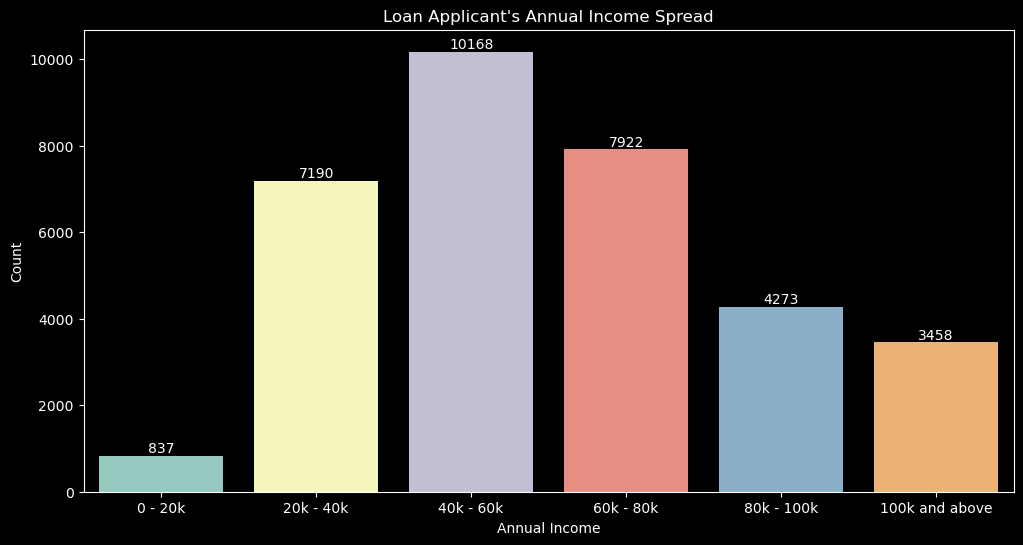

In [542]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_ax = sns.barplot(data=income_bins, x='index', y='annual_inc_bin', ax=ax)
bar_ax.bar_label(bar_ax.containers[0])
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Loan Applicant\'s Annual Income Spread')
plt.show()

- Most people having approved loans fall under the 40-60k annual income bracket.

----

### Loan amount

In [543]:
loan_data.loan_amnt.describe()

count    33848.000000
mean     10223.146124
std       6235.762541
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14250.000000
max      29175.000000
Name: loan_amnt, dtype: float64

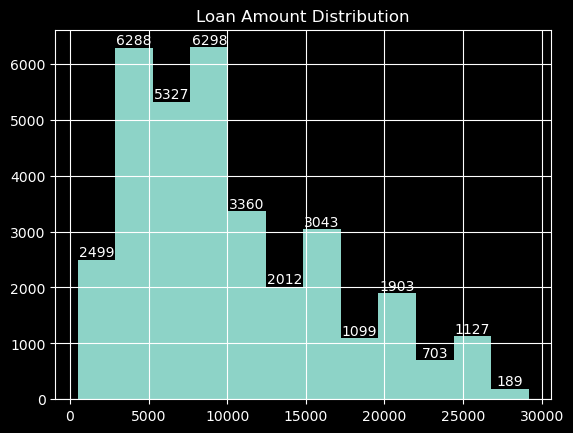

In [544]:
hist_ax = loan_data.loan_amnt.hist(bins=12)
hist_ax.bar_label(hist_ax.containers[0])
plt.title('Loan Amount Distribution')
plt.show()

In [545]:
def bucketize_loan_amnt(value):
    if value < 5000:
        return '0 - 5k'
    elif value < 10000:
        return '5k - 10k'
    elif value < 15000:
        return '10k - 15k'
    elif value < 20000:
        return '15k - 20k'
    elif value < 25000:
        return '20k - 25k'
    else:
        return '25k and above'

In [546]:
loan_data['loan_amnt_bin'] = loan_data.loan_amnt.apply(bucketize_loan_amnt)

In [547]:
loan_amnt_bins = loan_data.loan_amnt_bin.value_counts().reset_index()
loan_amnt_bins

,index,loan_amnt_bin
0,5k - 10k,11094
1,10k - 15k,7924
2,0 - 5k,6777
3,15k - 20k,4180
4,20k - 25k,2586
5,25k and above,1287


In [548]:
loan_amnt_bin_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - 20k', '20k - 25k', '25k and above']
loan_amnt_bins['index'] = pd.Categorical(loan_amnt_bins['index'], loan_amnt_bin_labels)
loan_amnt_bins.sort_values('index', inplace=True)
loan_amnt_bins

,index,loan_amnt_bin
2,0 - 5k,6777
0,5k - 10k,11094
1,10k - 15k,7924
3,15k - 20k,4180
4,20k - 25k,2586
5,25k and above,1287


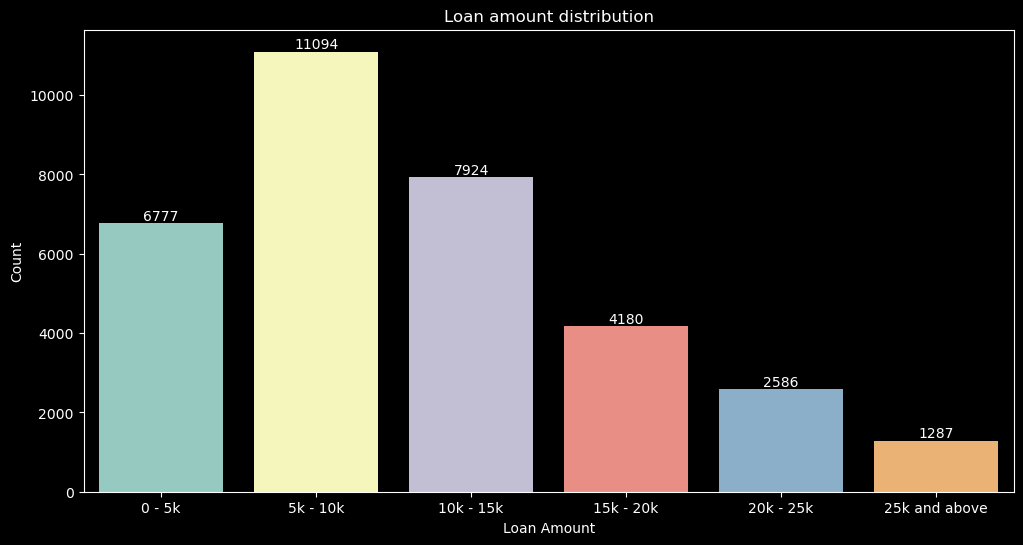

In [549]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_ax = sns.barplot(data=loan_amnt_bins, x='index', y='loan_amnt_bin')
bar_ax.bar_label(bar_ax.containers[0])
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan amount distribution')
plt.show()

- Max loan amount disbursed is __29,175__ excluding outliers. 
- Average loan amount is __10,224__ excluding outliers. 

---

### Loan Tenure

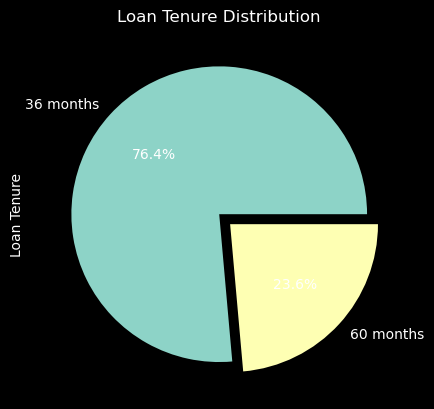

In [550]:
ax = loan_data.term.value_counts().plot(
    kind='pie',
    ylabel='Loan Tenure',
    title='Loan Tenure Distribution',
    autopct="%1.1f%%",
    labels=['36 months', '60 months'],
    explode=[0, 0.1]
)
plt.show()

> __Insight:__ 36 month loans appear to be more popular than 60 month loans. 

---

### Employment Length

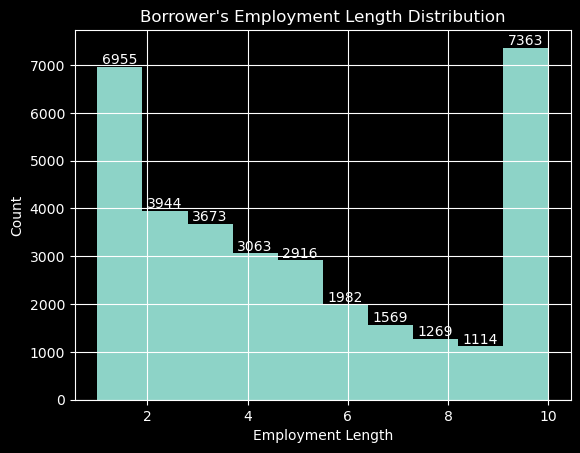

In [551]:
hist_ax = loan_data.emp_length.hist(bins=10)
hist_ax.bar_label(hist_ax.containers[0])
plt.title('Borrower\'s Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.show()

> __Insight:__ It appears that people who are new to the workforce and people who have been working for 10+ years are more likely to apply for a loan than others. The spike at 10+ years is likely because the dataset is not granular after 10+ years, hence people with experience of 10 or any more number of years are represented by 10. 

---

### Interest Rate

In [552]:
loan_data.int_rate.describe()

count    33848.000000
mean        11.823765
std          3.591930
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         22.110000
Name: int_rate, dtype: float64

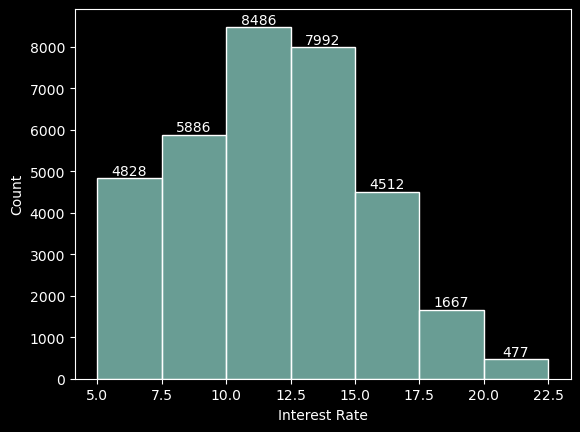

In [553]:
bar_ax = sns.histplot(data=loan_data, x='int_rate', bins=np.linspace(5, 22.5, 8))
bar_ax.bar_label(bar_ax.containers[0])
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()

Excluding outliers, 
- Average loan interest rate is __11.82%__
- Most approved loans have a interest rate between __10-12.5%__

---

### Issue Year

In [554]:
default_percentage_by_year = (loan_data[loan_data.loan_status=='Charged Off'].groupby(by='issue_year')['loan_status'].count() / loan_data.groupby(by='issue_year')['loan_status'].count()) * 100

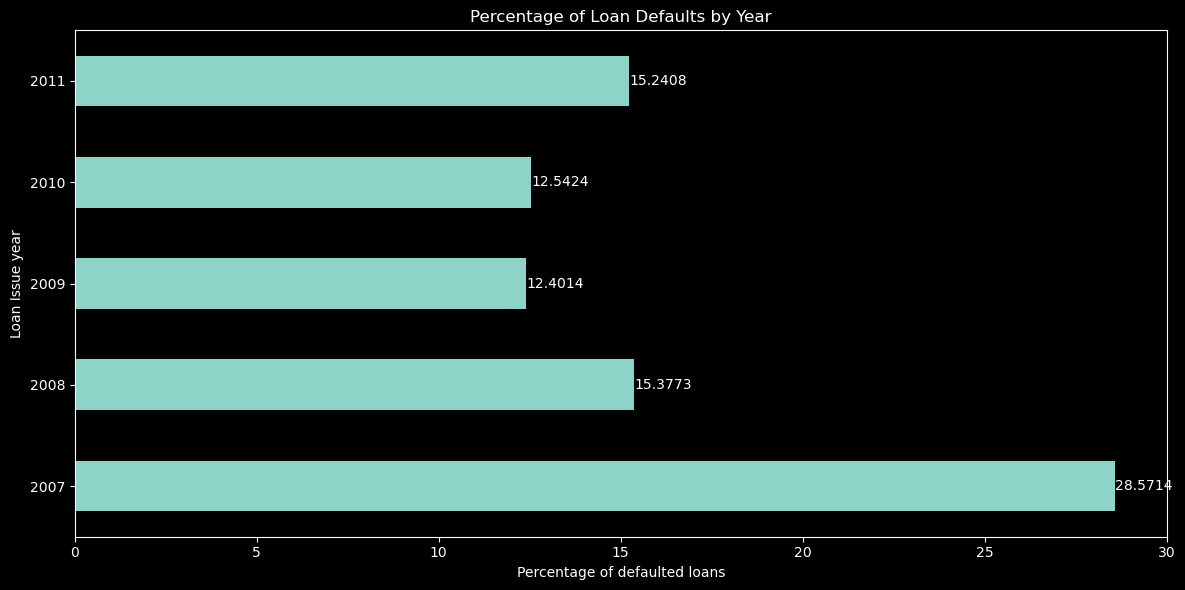

In [555]:
bar_ax = default_percentage_by_year.plot.barh(figsize=(12, 6))
bar_ax.bar_label(bar_ax.containers[0])
plt.title('Percentage of Loan Defaults by Year')
plt.ylabel('Loan Issue year')
plt.xlabel('Percentage of defaulted loans')
plt.tight_layout()
plt.show()

---

### Issue Month

In [556]:
loan_count_by_year_month = loan_data.groupby(by=['issue_year', 'issue_month'])['member_id'].count()
avg_loan_count_by_month = loan_count_by_year_month.groupby(by='issue_month').mean()
avg_loan_count_by_month = avg_loan_count_by_month.reset_index()

In [557]:
avg_loan_count_by_month

,issue_month,member_id
0,1,510.75
1,2,492.25
2,3,578.50
3,4,637.75
4,5,660.75
5,6,704.00
6,7,745.25
7,8,602.80
8,9,761.00
9,10,645.20


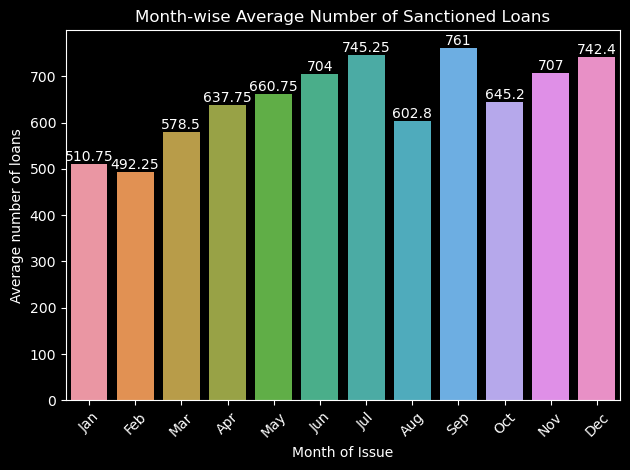

In [558]:
ax = sns.barplot(data=avg_loan_count_by_month, x='issue_month', y='member_id')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(
    ticks = list(range(0, 12, 1)), 
    labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=45
)
plt.xlabel('Month of Issue')
plt.ylabel('Average number of loans')
plt.title('Month-wise Average Number of Sanctioned Loans')
plt.tight_layout()
plt.show()

### State

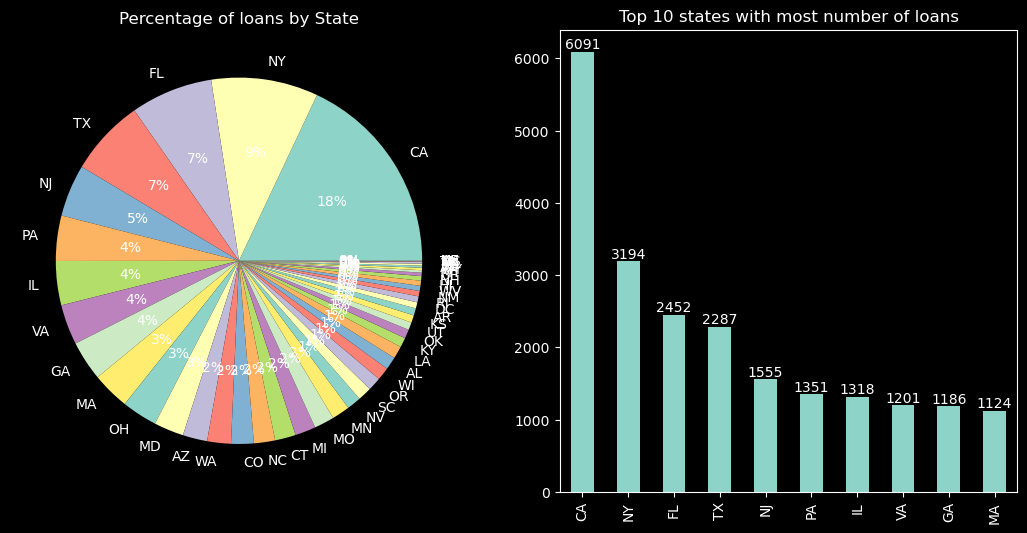

In [559]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
loan_data.addr_state.value_counts().plot.pie(autopct='%1.0f%%', ax=ax[0])
bar_ax = loan_data.addr_state.value_counts().nlargest(10).plot.bar(ax=ax[1])
bar_ax.bar_label(bar_ax.containers[0])
ax[0].set_title('Percentage of loans by State')
ax[1].set_title('Top 10 states with most number of loans')
ax[0].set_ylabel('')
plt.show()

### Number of Open Credit Lines

In [560]:
loan_data.open_acc.describe()

count    33848.000000
mean         9.155873
std          4.318206
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

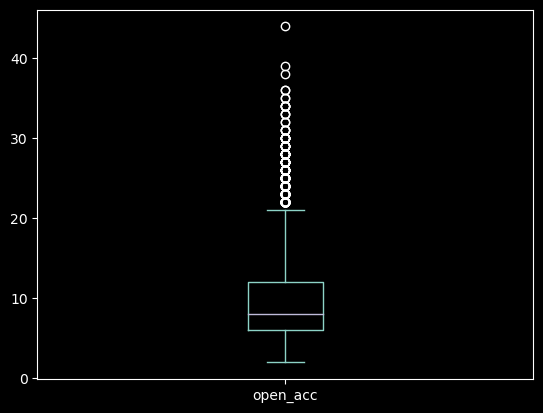

In [561]:
loan_data.open_acc.plot.box()
plt.show()

### Median Interest rate by grade / subgrade

Assumption: Grades and sub grades are used to determine interest rate, the following visualizations are used to confirm if this assumption is indeed true. 

In [562]:
median_interest_by_grade = pd.pivot_table(
    data=loan_data, 
    index=['grade'], 
    values=['int_rate'], 
    aggfunc=np.median
)

subgrade_int_rate = pd.pivot_table(
    data=loan_data, 
    index=['sub_grade'], 
    values=['int_rate'], 
    aggfunc=np.median
)

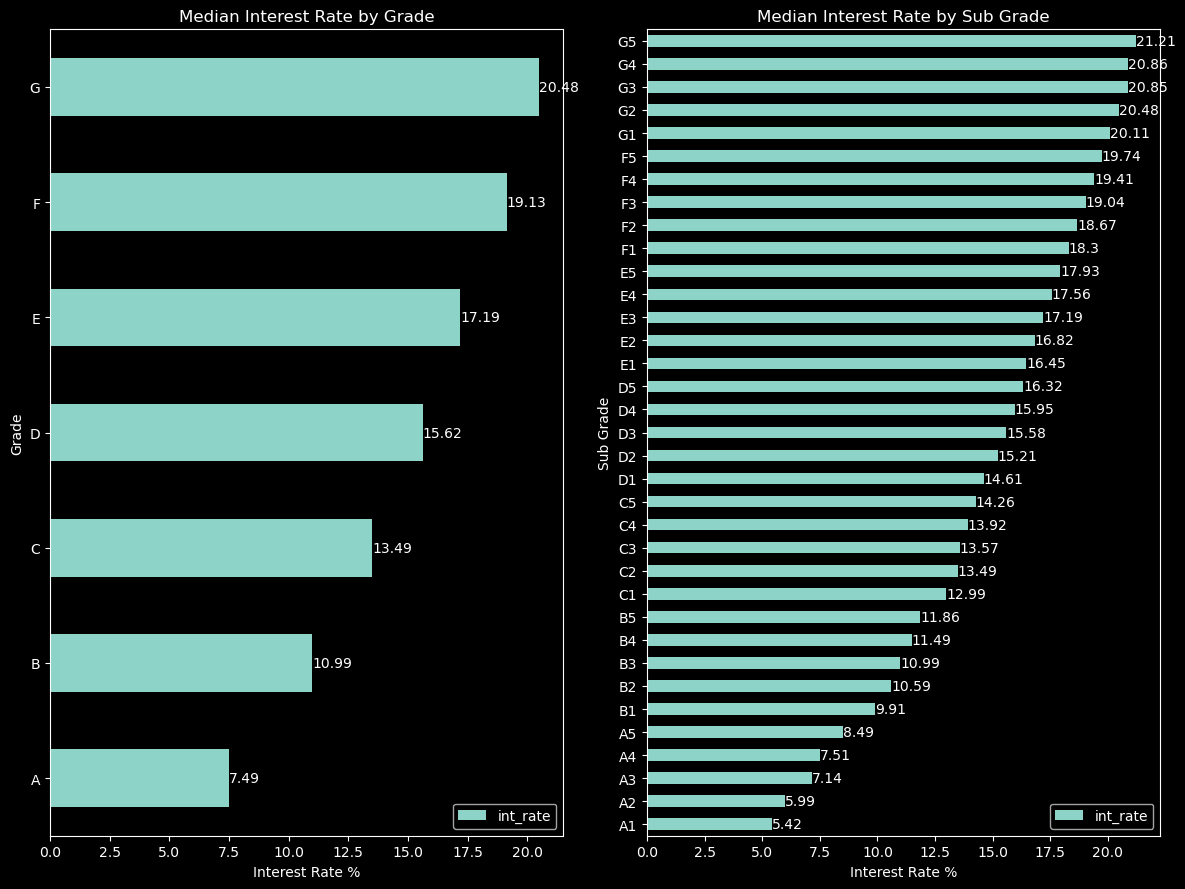

In [563]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 9))

bar_ax1 = median_interest_by_grade.plot(
    kind='barh',
    ax=ax[0],
)
ax[0].set_title('Median Interest Rate by Grade')
ax[0].set_xlabel('Interest Rate %')
ax[0].set_ylabel('Grade')

bar_ax2 = subgrade_int_rate.plot(
    kind='barh',
    ax=ax[1]
)
ax[1].set_title('Median Interest Rate by Sub Grade')
ax[1].set_xlabel('Interest Rate %')
ax[1].set_ylabel('Sub Grade')

[axes.bar_label(axes.containers[0]) for axes in [bar_ax1, bar_ax2]]

plt.tight_layout()
plt.show()

### Number of defaults by purpose

In [564]:
defaults_by_purpose = pd.pivot_table(
    data=loan_data, 
    columns=['loan_status'], 
    index=['purpose'],
    values=['member_id'],
    aggfunc='count'
)
defaults_by_purpose['Total'] = defaults_by_purpose.sum(axis='columns')
defaults_by_purpose

member_id             Total
loan_status        Charged Off Fully Paid       
purpose                                         
car                        149       1226   1375
credit_card                458       3981   4439
debt_consolidation        2356      13664  16020
educational                 46        236    282
home_improvement           280       2053   2333
house                       47        258    305
major_purchase             193       1723   1916
medical                     94        509    603
moving                      79        431    510
other                      528       2844   3372
renewable_energy            15         68     83
small_business             377       1062   1439
vacation                    49        279    328
wedding                     78        765    843

In [565]:
# calculate percentage of defaults by purpose
defaults_by_purpose['Default %'] = (defaults_by_purpose[('member_id', 'Charged Off')] / defaults_by_purpose['Total']) * 100

In [566]:
defaults_by_purpose.sort_values(by=['Default %'], inplace=True)

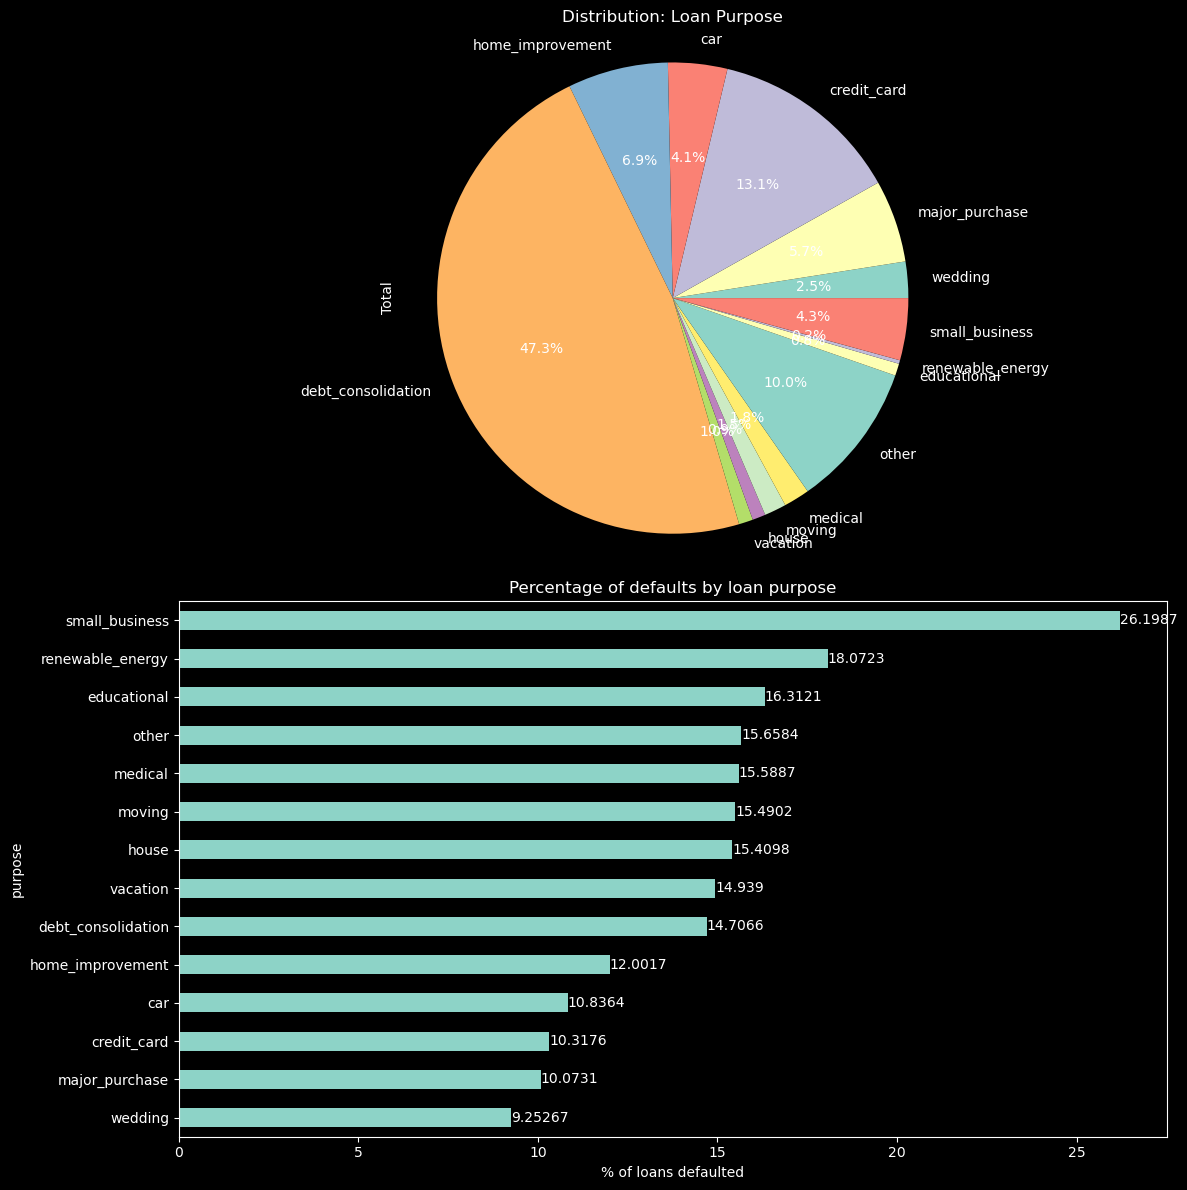

In [567]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

defaults_by_purpose.Total.plot.pie(ax=ax[0], radius=1.1, autopct="%1.1f%%")
ax[0].set_title('Distribution: Loan Purpose')

bar_ax = defaults_by_purpose['Default %'].plot(
    kind='barh',
    ax=ax[1]
)
bar_ax.bar_label(bar_ax.containers[0])

plt.title('Percentage of defaults by loan purpose')
plt.xlabel('% of loans defaulted')
plt.tight_layout()
plt.show()

Loans with the purpose __small_business__ seem to have the highest percentage of defaults.

### Defaults by loan grade

In [568]:
defaults_by_grade = pd.pivot_table(
    data=loan_data, 
    columns=['loan_status'], 
    index=['grade'],
    values=['member_id'],
    aggfunc='count'
)
defaults_by_grade['Default %'] = (defaults_by_grade[('member_id', 'Charged Off')] / defaults_by_grade.sum(axis='columns')) * 100
defaults_by_grade

member_id             Default %
loan_status Charged Off Fully Paid           
grade                                        
A                   534       8498   5.912312
B                  1237       9135  11.926340
C                  1173       5779  16.872842
D                   958       3493  21.523253
E                   561       1564  26.400000
F                   231        512  31.090175
G                    55        118  31.791908

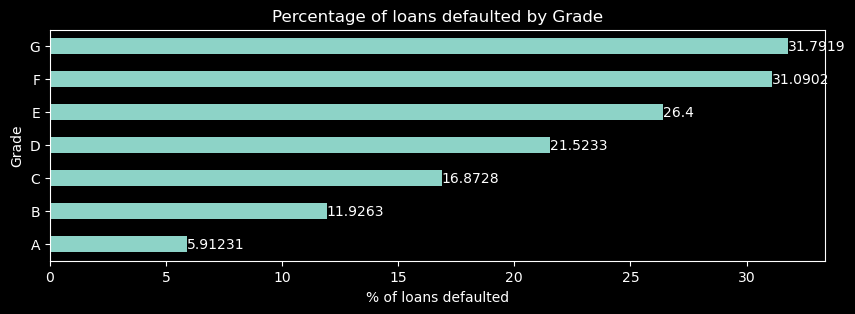

In [569]:
ax = defaults_by_grade['Default %'].plot(
    kind='barh',
    figsize=(10, 3),
    xlabel='Grade',
    title='Percentage of loans defaulted by Grade'
)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('% of loans defaulted')
plt.show()

### Defaults by State

In [570]:
defaults_by_state = pd.pivot_table(
    data=loan_data, 
    columns=['loan_status'], 
    index=['addr_state'],
    values=['member_id'],
    aggfunc='count'
)
defaults_by_state.fillna(0, inplace=True)
defaults_by_state['Total Loans'] = defaults_by_state.sum(axis='columns')
defaults_by_state['Default %'] = (defaults_by_state[('member_id', 'Charged Off')] / defaults_by_state['Total Loans']) * 100
defaults_by_state.sort_values(by=['Default %'], ascending=True, inplace=True)
defaults_by_state

member_id            Total Loans  Default %
loan_status Charged Off Fully Paid                       
addr_state                                               
NE                  0.0        1.0         1.0   0.000000
IN                  0.0        1.0         1.0   0.000000
ID                  0.0        3.0         3.0   0.000000
IA                  0.0        1.0         1.0   0.000000
WY                  2.0       70.0        72.0   2.777778
DC                 10.0      172.0       182.0   5.494505
KS                 23.0      201.0       224.0  10.267857
MS                  2.0       17.0        19.0  10.526316
DE                 11.0       91.0       102.0  10.784314
MT                  8.0       65.0        73.0  10.958904
TX                256.0     2031.0      2287.0  11.193704
AL                 43.0      340.0       383.0  11.227154
PA                153.0     1198.0      1351.0  11.324944
AR                 25.0      187.0       212.0  11.792453
MA                133.0      991.0      1124.0  11.832740
CO                 80.0      593.0       673.0  11.887073
VT                  6.0       44.0        50.0  12.000000
VA                146.0     1055.0      1201.0  12.156536
OH                130.0      931.0      1061.0  12.252592
WV                 19.0      133.0       152.0  12.500000
CT                 79.0      542.0       621.0  12.721417
NY                410.0     2784.0      3194.0  12.836569
LA                 48.0      324.0       372.0  12.903226
RI                 24.0      157.0       181.0  13.259669
IL                175.0     1143.0      1318.0  13.277693
MN                 72.0      466.0       538.0  13.382900
MI                 86.0      530.0       616.0  13.961039
WI                 54.0      330.0       384.0  14.062500
UT                 32.0      194.0       226.0  14.159292
KY                 41.0      247.0       288.0  14.236111
AZ                105.0      626.0       731.0  14.363885
OK                 39.0      231.0       270.0  14.444444
SC                 60.0      354.0       414.0  14.492754
NH                 20.0      117.0       137.0  14.598540
MD                133.0      759.0       892.0  14.910314
NC                 96.0      537.0       633.0  15.165877
CA                939.0     5152.0      6091.0  15.416188
GA                183.0     1003.0      1186.0  15.430017
NJ                243.0     1312.0      1555.0  15.627010
WA                111.0      598.0       709.0  15.655853
OR                 64.0      337.0       401.0  15.960100
MO                 98.0      501.0       599.0  16.360601
FL                420.0     2032.0      2452.0  17.128874
NM                 28.0      134.0       162.0  17.283951
HI                 27.0      124.0       151.0  17.880795
SD                 11.0       47.0        58.0  18.965517
AK                 12.0       51.0        63.0  19.047619
TN                  2.0        8.0        10.0  20.000000
NV                 90.0      334.0       424.0  21.226415

From the above data, it can be seen that some states have very less number of loans, which is not enough of a sample to arrive at any kind of conclusion. Hence, let's filter out the states which have less than 100 total loans. 

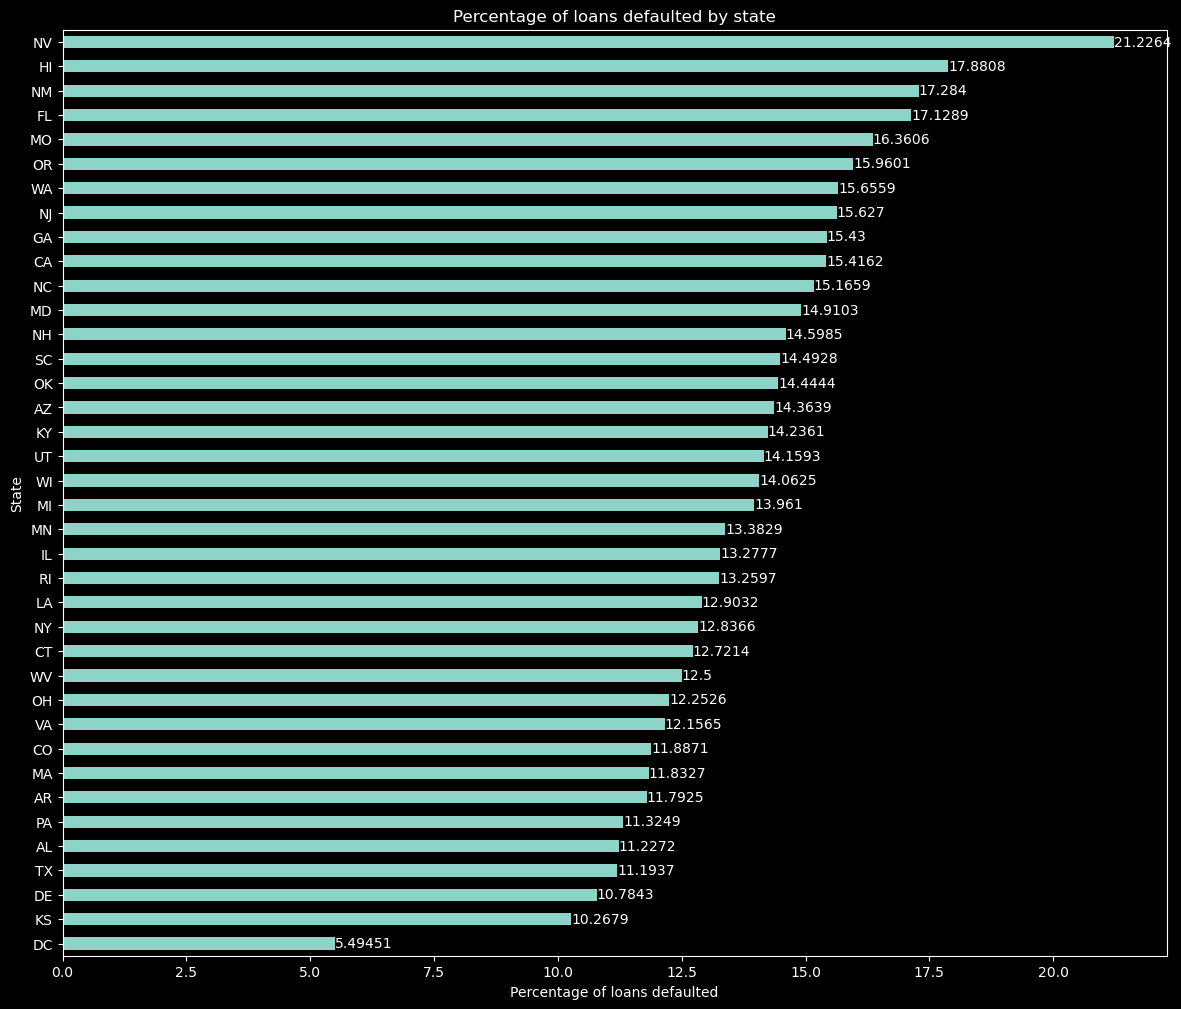

In [571]:
defaults_by_state = defaults_by_state[defaults_by_state['Total Loans'] >= 100]

plt.title('Percentage of loans defaulted by state')
ax = defaults_by_state['Default %'].plot.barh(figsize=(12, 10))
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.xlabel('Percentage of loans defaulted')
plt.ylabel('State')
plt.show()

### Percentage of defaults by Home Ownership

In [572]:
defaults_by_home_ownership = pd.pivot_table(
    data=loan_data, 
    columns=['loan_status'], 
    index=['home_ownership'],
    values=['member_id'],
    aggfunc='count'
)
defaults_by_home_ownership['Total'] = defaults_by_home_ownership.sum(axis='columns')
defaults_by_home_ownership['Default %'] = (defaults_by_home_ownership[('member_id', 'Charged Off')] / defaults_by_home_ownership['Total']) * 100
defaults_by_home_ownership

member_id             Total  Default %
loan_status    Charged Off Fully Paid                  
home_ownership                                         
MORTGAGE              1905      12451  14356  13.269713
OTHER                   17         73     90  18.888889
OWN                    356       2158   2514  14.160700
RENT                  2471      14417  16888  14.631691

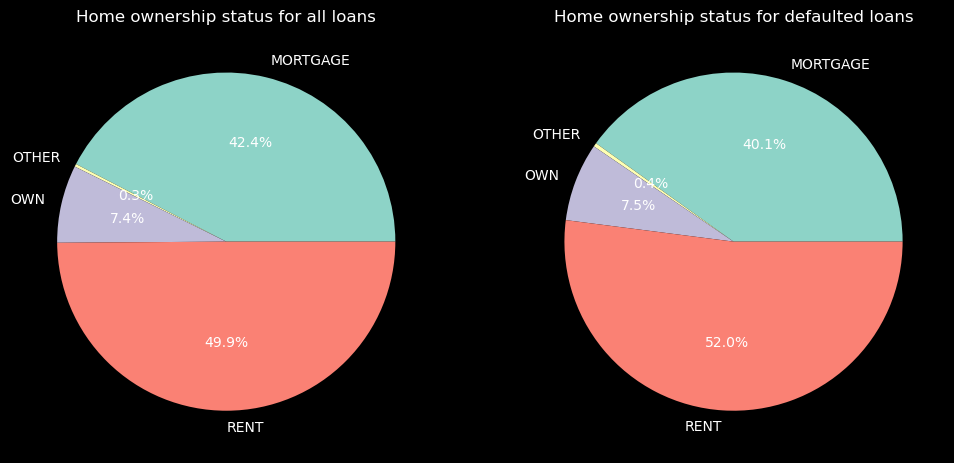

In [573]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


ax[0].pie(defaults_by_home_ownership.Total, labels=defaults_by_home_ownership.index, autopct='%1.1f%%')
ax[0].set_title('Home ownership status for all loans')

ax[1].pie(defaults_by_home_ownership[('member_id', 'Charged Off')], labels=defaults_by_home_ownership.index, autopct='%1.1f%%')
ax[1].set_title('Home ownership status for defaulted loans')


plt.show()

Home ownership category "OTHER" is more likely to default than other home ownership categories. 

### Dervied Metric: Loan Amount  / Annual Income

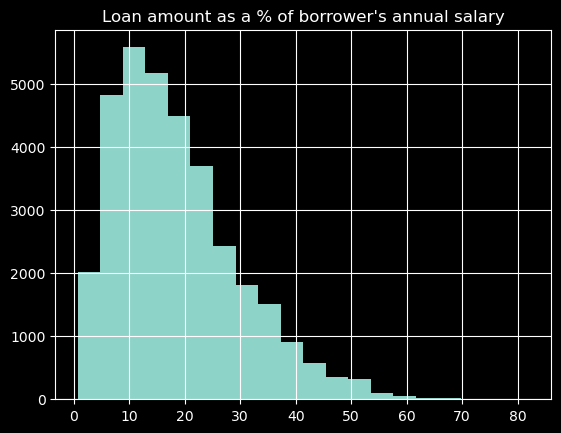

In [574]:
loan_data['LoanAmount:AnnualIncome'] = (loan_data.loan_amnt / loan_data.annual_inc) * 100
loan_data['LoanAmount:AnnualIncome'].hist(bins=20)
plt.title('Loan amount as a % of borrower\'s annual salary')
plt.show()

Most loan amounts are 10-15% of the borrower's annual salary

In [575]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,annual_inc_bin,loan_amnt_bin,LoanAmount:AnnualIncome
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,Jan-15,171.62,May-16,0.0,12,2011,20k - 40k,5k - 10k,20.833333
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,0.0,12,2011,20k - 40k,0 - 5k,8.333333
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,Jun-14,649.91,May-16,0.0,12,2011,0 - 20k,0 - 5k,19.588639
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.00,Jan-15,357.48,Apr-16,0.0,12,2011,40k - 60k,10k - 15k,20.325203
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0.00,Jan-15,161.03,Jan-16,0.0,12,2011,20k - 40k,5k - 10k,13.888889


### Income Verification status

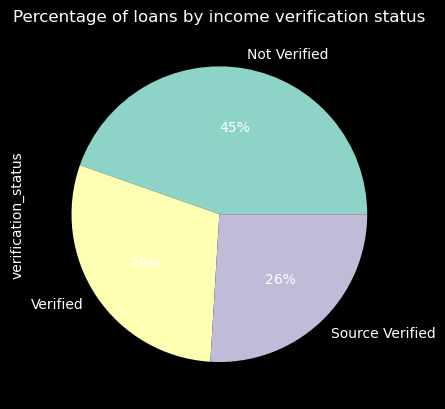

In [576]:
plt.title('Percentage of loans by income verification status')
loan_data['verification_status'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

In [577]:
defaults_by_income_verification = pd.pivot_table(
    data=loan_data, 
    columns=['loan_status'], 
    index=['verification_status'],
    values=['member_id'],
    aggfunc='count'
)

defaults_by_income_verification['Total'] = defaults_by_income_verification.sum(axis='columns')
defaults_by_income_verification['Default %'] = (defaults_by_income_verification[('member_id', 'Charged Off')] / defaults_by_income_verification['Total']) * 100
defaults_by_income_verification

member_id             Total  Default %
loan_status         Charged Off Fully Paid                  
verification_status                                         
Not Verified               1842      13258  15100  12.198675
Source Verified            1280       7511   8791  14.560346
Verified                   1627       8330   9957  16.340263

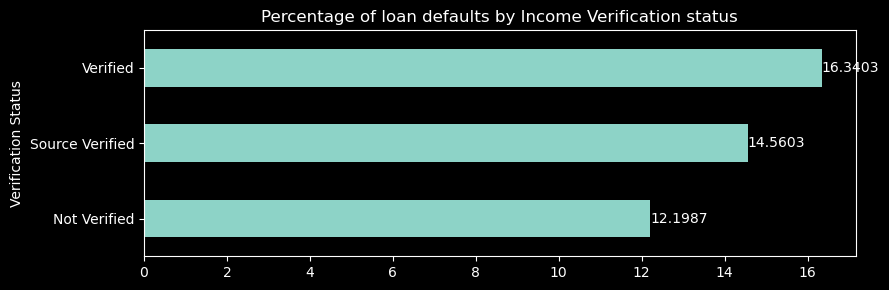

In [578]:
ax = defaults_by_income_verification['Default %'].plot(
    kind='barh',
    figsize=(9, 3),
    ylabel='Percentage of loans defaulted',
    xlabel='Verification Status',
    title='Percentage of loan defaults by Income Verification status'
)
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

### Correlations

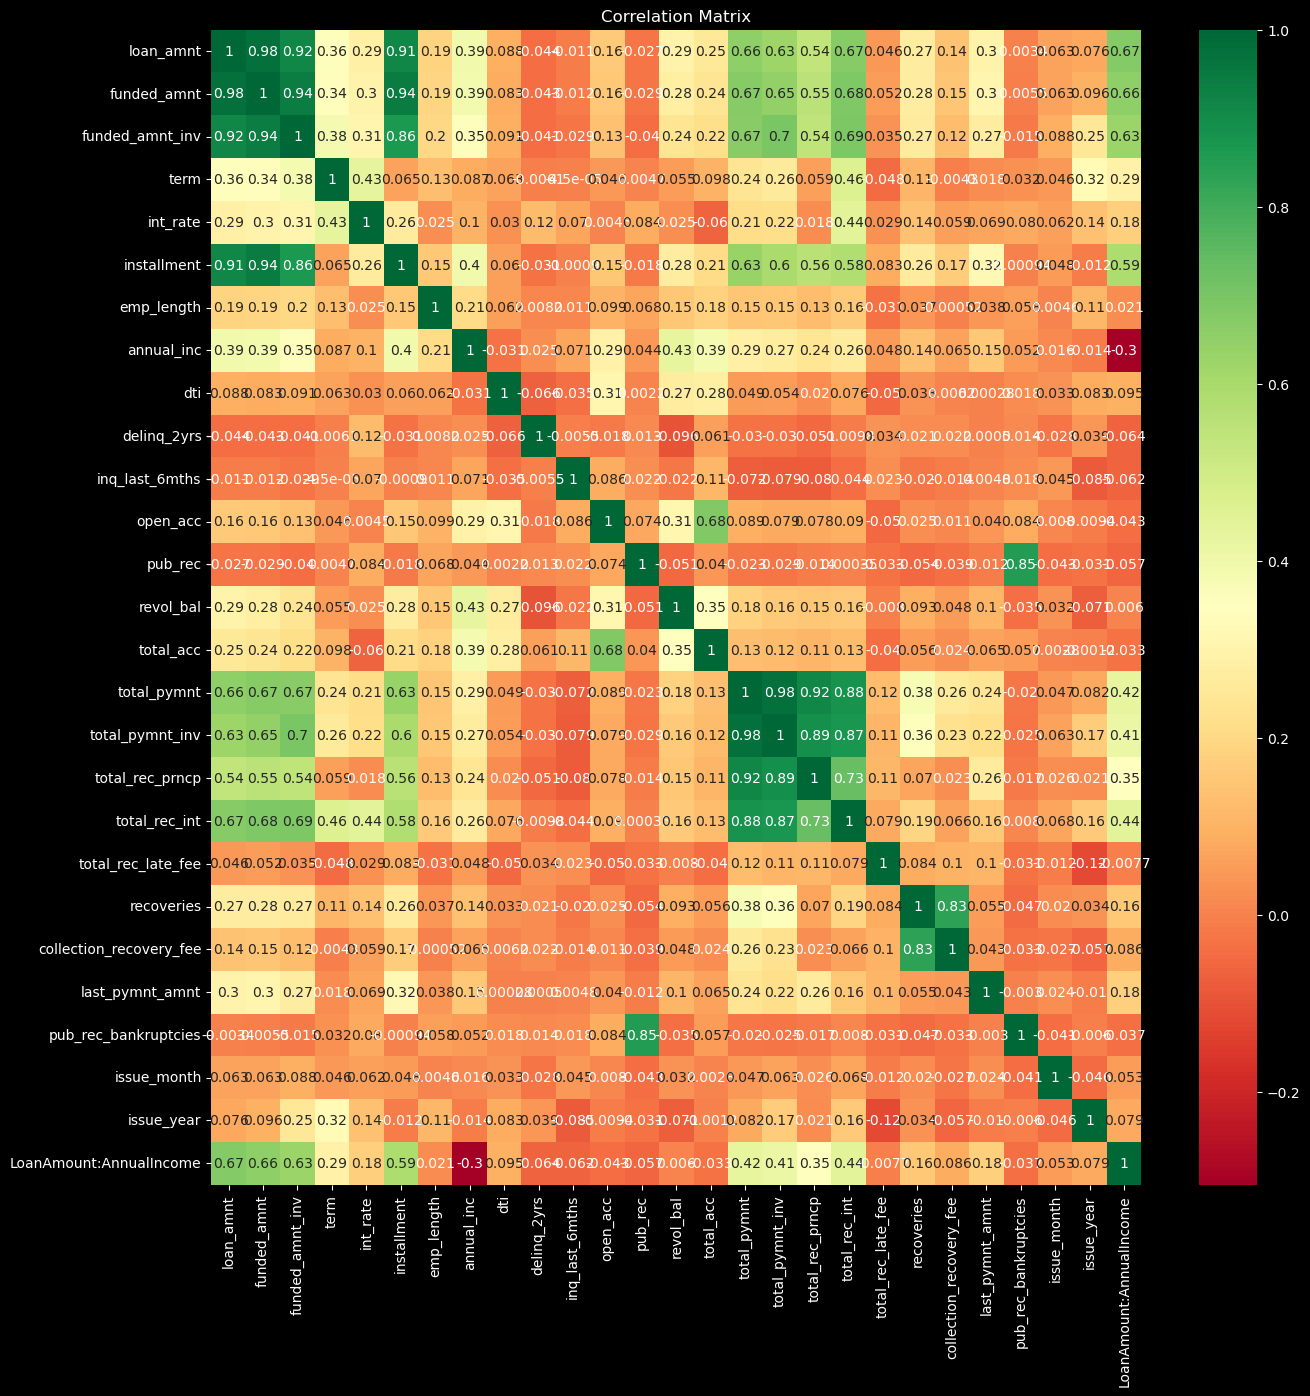

In [579]:
corr_matrix = loan_data[loan_data.loan_status == 'Charged Off'].loc[:, (loan_data.columns != 'member_id') & (loan_data.columns != 'id')].corr()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
sns.heatmap(data=corr_matrix, cmap='RdYlGn', annot=True, ax=ax)
plt.title('Correlation Matrix')
plt.show()

### Temp

In [580]:
loan_data.loc[:, ['loan_status', 'int_rate', 'loan_amnt', 'funded_amnt']]

,loan_status,int_rate,loan_amnt,funded_amnt
0,Fully Paid,10.65,5000,5000
1,Charged Off,15.27,2500,2500
2,Fully Paid,15.96,2400,2400
3,Fully Paid,13.49,10000,10000
5,Fully Paid,7.90,5000,5000
...,...,...,...,...
39562,Fully Paid,10.28,4800,4800
39573,Fully Paid,10.59,7000,7000
39623,Charged Off,12.49,9000,9000
39666,Charged Off,11.22,15450,15450


In [581]:
loan_data[loan_data.loan_amnt != loan_data.funded_amnt]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,annual_inc_bin,loan_amnt_bin,LoanAmount:AnnualIncome
61,1068934,1277395,17500,8950,8925.000000,60,17.27,223.74,D,D3,...,0.00,Feb-16,2487.58,Jan-16,0.0,12,2011,40k - 60k,15k - 20k,43.750000
66,1069093,1303740,12500,8925,8925.000000,60,17.27,223.11,D,D3,...,0.00,Feb-14,223.11,May-16,1.0,12,2011,20k - 40k,10k - 15k,41.666667
70,1069043,1303486,20975,13575,13550.000000,60,17.58,341.63,D,D4,...,0.00,Apr-14,9245.21,Apr-14,1.0,12,2011,40k - 60k,20k - 25k,47.670455
77,1068416,1302799,7250,7200,7175.000000,60,21.67,197.51,F,F3,...,0.00,Sep-12,6824.70,Apr-16,1.0,12,2011,60k - 80k,5k - 10k,9.666667
96,1049528,1280928,20000,12800,12775.000000,60,11.71,282.86,B,B3,...,0.00,Nov-13,9242.39,Nov-13,0.0,12,2011,40k - 60k,20k - 25k,41.841004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38882,309242,309239,18000,10400,6250.001369,36,10.71,339.06,B,B5,...,3.23,Jun-09,339.06,May-16,0.0,4,2008,40k - 60k,15k - 20k,34.214028
38889,308272,308257,12000,6500,4250.000000,36,11.34,213.85,C,C2,...,0.00,Apr-11,263.30,Apr-11,1.0,4,2008,40k - 60k,10k - 15k,23.529412
38890,307946,307937,25000,18825,14575.181140,36,15.76,659.61,F,F1,...,0.00,May-11,68.69,May-11,1.0,4,2008,100k and above,25k and above,20.833333
38893,307524,307516,20000,6875,3775.000000,36,10.71,224.14,B,B5,...,0.00,Oct-08,6102.79,Sep-08,0.0,4,2008,20k - 40k,20k - 25k,51.282051


In [582]:
avg_funded_amount_by_income_slab = pd.pivot_table(data=loan_data, index=['annual_inc_bin'], values=['funded_amnt'], aggfunc=np.mean)
avg_funded_amount_by_income_slab.sort_values(by='funded_amnt', inplace=True)
avg_funded_amount_by_income_slab

,funded_amnt
annual_inc_bin,
0 - 20k,3848.357228
20k - 40k,7115.636300
40k - 60k,9484.193057
60k - 80k,11165.545317
80k - 100k,12374.771823
100k and above,13422.173222


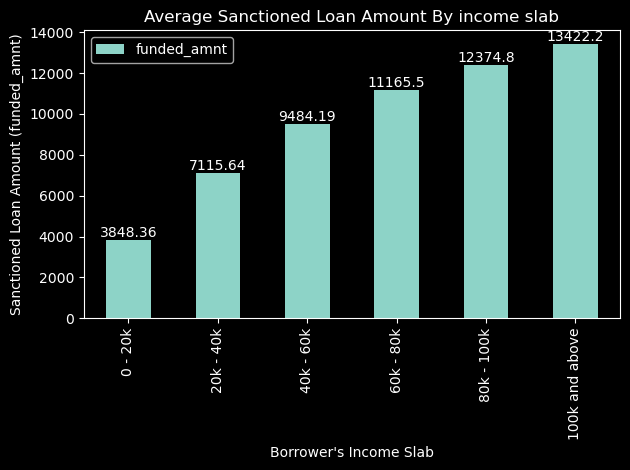

In [583]:
ax = avg_funded_amount_by_income_slab.plot(
    kind='bar',
    xlabel='Borrower\'s Income Slab', 
    ylabel='Sanctioned Loan Amount (funded_amnt)',
    title='Average Sanctioned Loan Amount By income slab'
)
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

### Percentage of defaults by publicly recorded bankruptcies

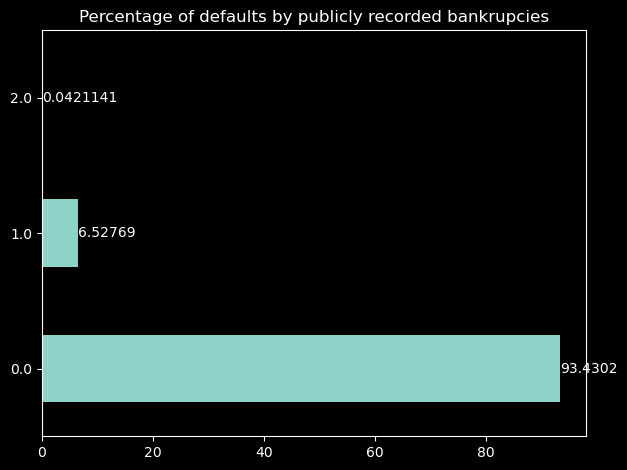

In [584]:
bar_ax = (loan_data[loan_data.loan_status=='Charged Off'].pub_rec_bankruptcies.value_counts(normalize=True) * 100).plot.barh()
bar_ax.bar_label(bar_ax.containers[0])
plt.title('Percentage of defaults by publicly recorded bankrupcies')
plt.tight_layout()
plt.show()

---

### Percentage of defaults by number of derogatory public records

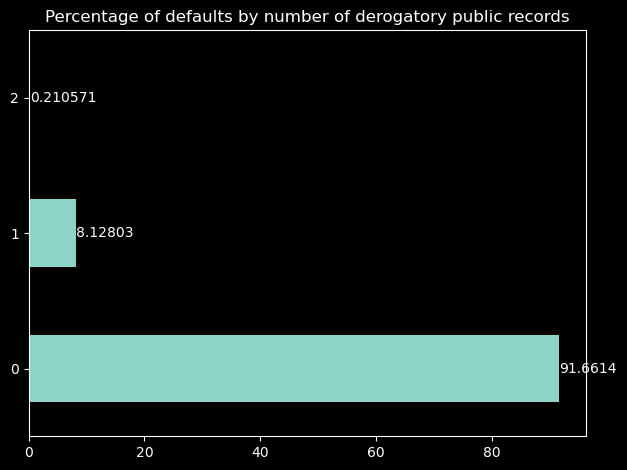

In [585]:
bar_ax = (loan_data[loan_data.loan_status=='Charged Off'].pub_rec.value_counts(normalize=True) * 100).plot.barh()
bar_ax.bar_label(bar_ax.containers[0])
plt.title('Percentage of defaults by number of derogatory public records')
plt.tight_layout()
plt.show()

---

### Number of defaults per income slab

In [586]:
defaults_by_income_slab = pd.pivot_table(data=loan_data, index=['annual_inc_bin'], columns=['loan_status'], aggfunc='size')

# Calculate row-wise totals
defaults_by_income_slab['Total'] = defaults_by_income_slab.sum(axis='columns')

# Calculate percentage of default for each income slab
defaults_by_income_slab['Default %'] = (defaults_by_income_slab['Charged Off'] / defaults_by_income_slab['Total']) * 100

# Sort descending by Default % values
defaults_by_income_slab.sort_values(by='Default %', ascending=False, inplace=True)

defaults_by_income_slab

loan_status,Charged Off,Fully Paid,Total,Default %
annual_inc_bin,,,,
0 - 20k,165,672,837,19.713262
20k - 40k,1226,5964,7190,17.051460
40k - 60k,1515,8653,10168,14.899685
60k - 80k,1047,6875,7922,13.216360
80k - 100k,467,3806,4273,10.929090
100k and above,329,3129,3458,9.514170


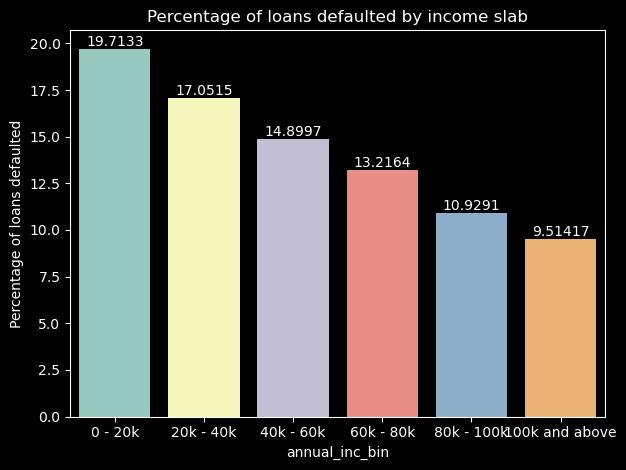

In [587]:
ax = sns.barplot(data=defaults_by_income_slab, x=defaults_by_income_slab.index, y='Default %')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Percentage of loans defaulted by income slab')
plt.ylabel('Percentage of loans defaulted')
plt.tight_layout()
plt.show()

### Average installment amount by income slab

In [588]:
avg_installment_by_income_slab = pd.pivot_table(data=loan_data, index='annual_inc_bin', values='installment', aggfunc=np.mean).sort_values(by='installment')
avg_installment_by_income_slab

,installment
annual_inc_bin,
0 - 20k,121.809725
20k - 40k,216.605373
40k - 60k,283.137793
60k - 80k,333.947824
80k - 100k,371.380917
100k and above,406.483597


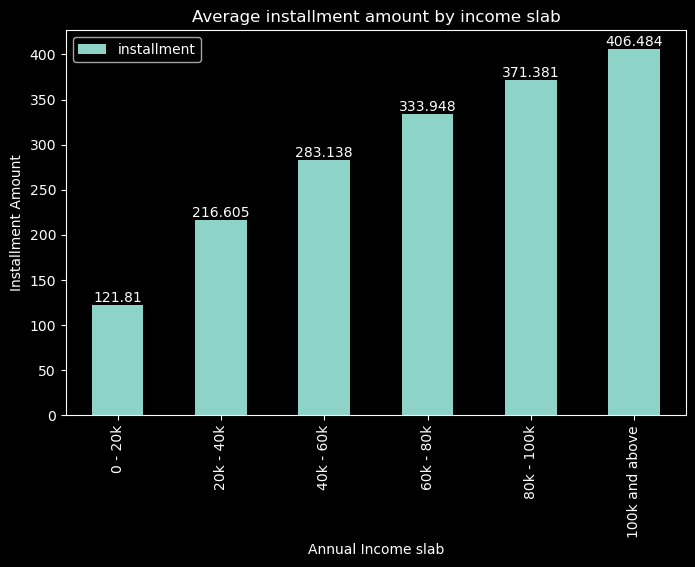

In [589]:
ax = avg_installment_by_income_slab.plot(
    kind='bar',
    figsize=(8, 5),
    xlabel='Annual Income slab',
    ylabel='Installment Amount',
    title='Average installment amount by income slab'
)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [590]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year', 'annual_inc_bin',
       'loan_amnt_bin', 'LoanAmount:AnnualIncome'],
      dtype='object')

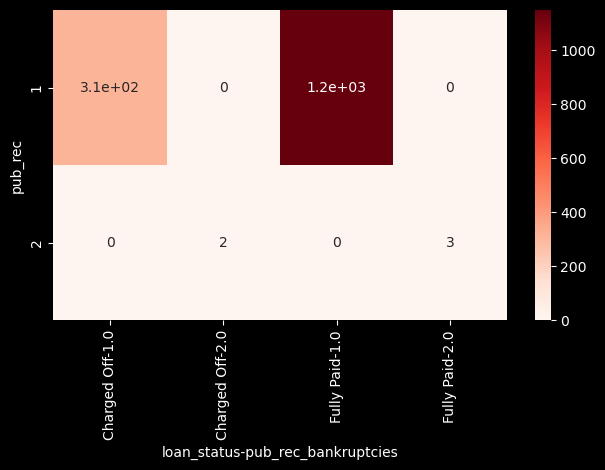

In [591]:
public_records = loan_data[(loan_data.pub_rec > 0) & (loan_data.pub_rec_bankruptcies > 0)].pivot_table(index='pub_rec', columns=['loan_status', 'pub_rec_bankruptcies'], aggfunc='size').fillna(0)
sns.heatmap(data=public_records, cmap='Reds', annot=True)
plt.tight_layout()
plt.show()

---

### LoanAmount / Annual Income ratio vs loan status

In [592]:
pd.pivot_table(data=loan_data, index='annual_inc_bin', columns='loan_status', values=['LoanAmount:AnnualIncome'], aggfunc=np.mean)

LoanAmount:AnnualIncome           
loan_status                Charged Off Fully Paid
annual_inc_bin                                   
0 - 20k                      26.687172  24.866268
100k and above               13.662254  11.980006
20k - 40k                    25.687941  22.586827
40k - 60k                    22.721924  19.484933
60k - 80k                    19.196502  16.572008
80k - 100k                   16.200117  14.287975

---

### Loan Defaults by Employment Length, Annual Income Slabs

In [593]:
binned_defaults_data = pd.pivot_table(
    data=loan_data[loan_data.loan_status=='Charged Off'], 
    columns=['emp_length'], 
    index='annual_inc_bin', 
    aggfunc='size'
).div(pd.pivot_table(
    data=loan_data,
    columns=['emp_length'],
    index='annual_inc_bin',
    aggfunc='size'
)).mul(100)
binned_defaults_data

emp_length,1,2,3,4,5,6,7,8,9,10
annual_inc_bin,,,,,,,,,,
0 - 20k,19.783198,22.516556,21.348315,15.384615,18.604651,10.714286,12.500000,33.333333,40.000000,17.391304
100k and above,9.201389,9.364548,8.139535,7.299270,12.686567,11.111111,8.227848,12.500000,6.818182,9.765258
20k - 40k,16.500499,16.506718,15.981735,17.514970,15.586420,16.705882,21.428571,16.740088,13.609467,20.359281
40k - 60k,14.430894,13.522013,13.790036,12.823276,14.254625,14.188034,16.096579,13.580247,15.229885,18.049010
60k - 80k,11.981914,10.173697,12.947977,12.587413,14.352574,12.883436,11.940299,12.621359,13.333333,15.570600
80k - 100k,9.732017,7.219251,10.666667,11.750000,10.327456,12.062257,13.366337,12.790698,10.000000,11.980440


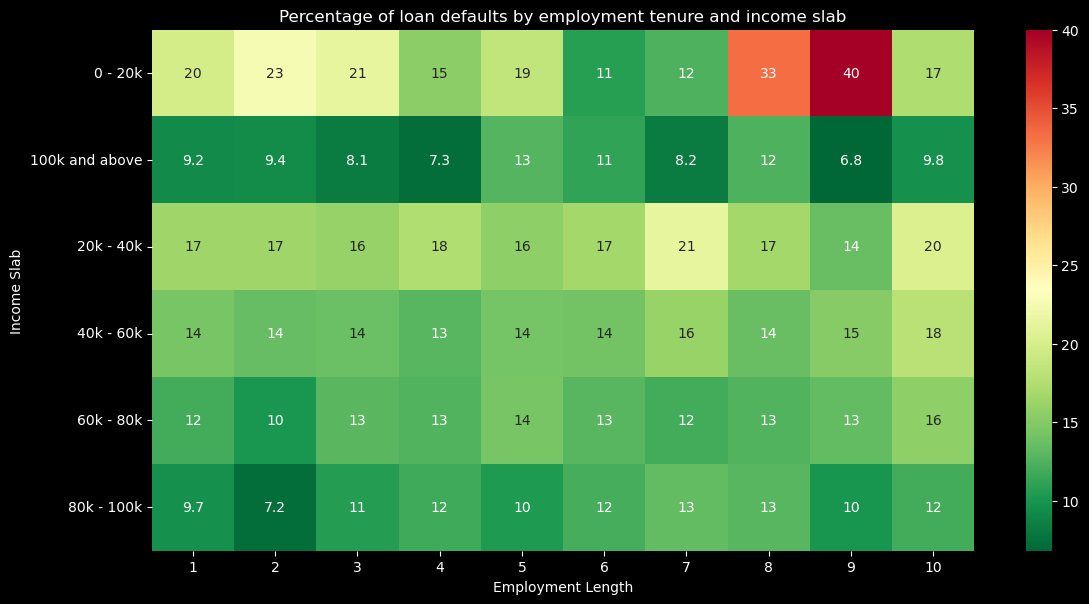

In [594]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(binned_defaults_data, cmap='RdYlGn_r', annot=True)
plt.tight_layout()
plt.title('Percentage of loan defaults by employment tenure and income slab')
plt.xlabel('Employment Length')
plt.ylabel('Income Slab')
plt.show()

### Driver Variables 

- int_rate
- annual_inc

- Grade (As the loan grade decreases, default )

- addr_state (Borrowers from Nevada are a)